# MAC0219 EP1 - Cálculo do Conjunto de Mandelbrot em Paralelo com Pthreads e OpenMP


|                Nome              |   NUSP   |
|----------------------------------|----------|
| Eduardo Freire de Carvalho Lima  | 10262627 |
| Kaique Kazuyoshi Komata          | 10297741 |
| Lucas Civile Nagamine            |  7083142 |
| Victor Hugo Miranda Pinto        | 10297720 |
| Yurick Yussuke Honda             | 10258984 |


## Experimento

O objetivo do experimento é visualizar e comparar a performance do código sequencial com os códigos paralelizados com Pthreads e OpenMP do cálculo do Cojunto de Mandelbrot.<br>
O experimento consta de execuções dos códigos sequencial e paralelizados de cálculo do Conjunto de Mandelbrot em quatro regiões distintas: <i>Seahorse Valley</i>, <i>Elephant Valley</i>, <i>Triple Spiral Valley</i> e <i>Full Picture</i>. Essas execuções são realizadas com diferentes valores dos parâmetros tamanho da imagem, número de threads e presença de I/O e alocação de memória:
- Tamanho da Imagem: de $2^4$ a $2^{13}$;
- Número de Threads para os códigos paralelizados: de $2^0$ a $2^5$;
- Presença ou não de operações de I/O e alocação de memória para o código sequencial.

Assim, cada combinação de parâmetros é executada 10 vezes e as médias dos tempos de execução e os intervalos de confiança são armazenados para construção de gráficos e análise.<br>

Para o experimento foram utilizados 4 códigos que fazem o cálculo do Conjunto de Mandelbrot:
- mandelbrot_seq.c: faz o cálculo sequencial com operações de I/O e alocação de memória;
- mandelbrot_seq_sem.c: faz o cálculo sequencial sem operações de I/O e alocação de memória;
- mandelbrot_pth.c: faz o cálculo paralelizado com Pthreads;
- mandelbrot_omp.c: faz o cálculo paralelizado com OpenMP.

Além disso, também foi utilizado um script <i>run_measurements.sh</i> para realizar os experimentos e trechos de códigos em Julia definidos nesse notebook.

## Relatório

Primeiramente, rodamos o comando na célula abaixo para instalar e atualizar os pacotes e dependências necessários para a execução dos scripts desse notebook:

In [191]:
] up

   Updating registry at `C:\Users\kaiqu\.julia\registries\General`
   Updating git-repo `https://github.com/JuliaRegistries/General.git`


Fetching: [========================================>]  100.0 %.0 %]  81.4 %

   Updating `C:\Users\kaiqu\Desktop\AA\MAC0219\EP1\src\Project.toml`
 [no changes]
   Updating `C:\Users\kaiqu\Desktop\AA\MAC0219\EP1\src\Manifest.toml`
 [no changes]


Depois, rodamos a célula abaixo para verificar os status dos pacotes e ver se há algum problema neles:

In [2]:
] st

Status `C:\Users\kaiqu\Desktop\AA\MAC0219\EP1\src\Project.toml`
  [336ed68f] CSV v0.6.2
  [a93c6f00] DataFrames v0.21.0
  [91a5bcdd] Plots v1.3.0


Após isso, entramos no modo shell para rodar o script <i>run_measurements.sh</i>, que irá compilar todos os arquivos em C que calculam o Conjunto de Mandelbrot, executar todos os experimentos necessários e calcular os tempos de execução com o comando <i>perf stat</i> do Linux. Como o script roda todos os experimentos de uma única vez, sua execução pode demorar algumas horas:

In [53]:
; ./run_measurements.sh

make: Nothing to be done for 'all'.


+ MEASUREMENTS=10
+ ITERATIONS=10
+ INITIAL_SIZE=16
+ THREADS_ITERATIONS=6
+ INITIAL_THREADS=1
+ THREADS=1
+ SIZE=16
+ NAMES1=('mandelbrot_seq' 'mandelbrot_seq_sem')
+ NAMES2=('mandelbrot_pth' 'mandelbrot_omp')
+ make
+ mkdir results
+ for NAME in ${NAMES1[@]}
+ mkdir results/mandelbrot_seq
+ (( i=1 ))
+ (( i<=10 ))
+ perf stat -r 10 -n ./mandelbrot_seq -2.5 1.5 -2.0 2.0 16
+ perf stat -r 10 -n ./mandelbrot_seq -0.8 -0.7 0.05 0.15 16
+ perf stat -r 10 -n ./mandelbrot_seq 0.175 0.375 -0.1 0.1 16
+ perf stat -r 10 -n ./mandelbrot_seq -0.188 -0.012 0.554 0.754 16
+ SIZE=32
+ (( i++ ))
+ (( i<=10 ))
+ perf stat -r 10 -n ./mandelbrot_seq -2.5 1.5 -2.0 2.0 32
+ perf stat -r 10 -n ./mandelbrot_seq -0.8 -0.7 0.05 0.15 32
+ perf stat -r 10 -n ./mandelbrot_seq 0.175 0.375 -0.1 0.1 32
+ perf stat -r 10 -n ./mandelbrot_seq -0.188 -0.012 0.554 0.754 32
+ SIZE=64
+ (( i++ ))
+ (( i<=10 ))
+ perf stat -r 10 -n ./mandelbrot_seq -2.5 1.5 -2.0 2.0 64
+ perf stat -r 10 -n ./mandelbrot_seq -0.8 -0.7 0.05 

+ THREADS=32
+ (( j++ ))
+ (( j<=THREADS_ITERATIONS ))
+ perf stat -r 10 -n ./mandelbrot_pth -2.5 1.5 -2.0 2.0 16 32
+ perf stat -r 10 -n ./mandelbrot_pth -0.8 -0.7 0.05 0.15 16 32
+ perf stat -r 10 -n ./mandelbrot_pth 0.175 0.375 -0.1 0.1 16 32
+ perf stat -r 10 -n ./mandelbrot_pth -0.188 -0.012 0.554 0.754 16 32
+ THREADS=64
+ (( j++ ))
+ (( j<=THREADS_ITERATIONS ))
+ THREADS=1
+ SIZE=32
+ (( i++ ))
+ (( i<=10 ))
+ (( j=1 ))
+ (( j<=THREADS_ITERATIONS ))
+ perf stat -r 10 -n ./mandelbrot_pth -2.5 1.5 -2.0 2.0 32 1
+ perf stat -r 10 -n ./mandelbrot_pth -0.8 -0.7 0.05 0.15 32 1
+ perf stat -r 10 -n ./mandelbrot_pth 0.175 0.375 -0.1 0.1 32 1
+ perf stat -r 10 -n ./mandelbrot_pth -0.188 -0.012 0.554 0.754 32 1
+ THREADS=2
+ (( j++ ))
+ (( j<=THREADS_ITERATIONS ))
+ perf stat -r 10 -n ./mandelbrot_pth -2.5 1.5 -2.0 2.0 32 2
+ perf stat -r 10 -n ./mandelbrot_pth -0.8 -0.7 0.05 0.15 32 2
+ perf stat -r 10 -n ./mandelbrot_pth 0.175 0.375 -0.1 0.1 32 2
+ perf stat -r 10 -n ./mandelbrot_pth -0

+ THREADS=64
+ (( j++ ))
+ (( j<=THREADS_ITERATIONS ))
+ THREADS=1
+ SIZE=512
+ (( i++ ))
+ (( i<=10 ))
+ (( j=1 ))
+ (( j<=THREADS_ITERATIONS ))
+ perf stat -r 10 -n ./mandelbrot_pth -2.5 1.5 -2.0 2.0 512 1
+ perf stat -r 10 -n ./mandelbrot_pth -0.8 -0.7 0.05 0.15 512 1
+ perf stat -r 10 -n ./mandelbrot_pth 0.175 0.375 -0.1 0.1 512 1
+ perf stat -r 10 -n ./mandelbrot_pth -0.188 -0.012 0.554 0.754 512 1
+ THREADS=2
+ (( j++ ))
+ (( j<=THREADS_ITERATIONS ))
+ perf stat -r 10 -n ./mandelbrot_pth -2.5 1.5 -2.0 2.0 512 2
+ perf stat -r 10 -n ./mandelbrot_pth -0.8 -0.7 0.05 0.15 512 2
+ perf stat -r 10 -n ./mandelbrot_pth 0.175 0.375 -0.1 0.1 512 2
+ perf stat -r 10 -n ./mandelbrot_pth -0.188 -0.012 0.554 0.754 512 2
+ THREADS=4
+ (( j++ ))
+ (( j<=THREADS_ITERATIONS ))
+ perf stat -r 10 -n ./mandelbrot_pth -2.5 1.5 -2.0 2.0 512 4
+ perf stat -r 10 -n ./mandelbrot_pth -0.8 -0.7 0.05 0.15 512 4
+ perf stat -r 10 -n ./mandelbrot_pth 0.175 0.375 -0.1 0.1 512 4
+ perf stat -r 10 -n ./mandelbrot

+ perf stat -r 10 -n ./mandelbrot_pth -0.8 -0.7 0.05 0.15 8192 1
+ perf stat -r 10 -n ./mandelbrot_pth 0.175 0.375 -0.1 0.1 8192 1
+ perf stat -r 10 -n ./mandelbrot_pth -0.188 -0.012 0.554 0.754 8192 1
+ THREADS=2
+ (( j++ ))
+ (( j<=THREADS_ITERATIONS ))
+ perf stat -r 10 -n ./mandelbrot_pth -2.5 1.5 -2.0 2.0 8192 2
+ perf stat -r 10 -n ./mandelbrot_pth -0.8 -0.7 0.05 0.15 8192 2
+ perf stat -r 10 -n ./mandelbrot_pth 0.175 0.375 -0.1 0.1 8192 2
+ perf stat -r 10 -n ./mandelbrot_pth -0.188 -0.012 0.554 0.754 8192 2
+ THREADS=4
+ (( j++ ))
+ (( j<=THREADS_ITERATIONS ))
+ perf stat -r 10 -n ./mandelbrot_pth -2.5 1.5 -2.0 2.0 8192 4
+ perf stat -r 10 -n ./mandelbrot_pth -0.8 -0.7 0.05 0.15 8192 4
+ perf stat -r 10 -n ./mandelbrot_pth 0.175 0.375 -0.1 0.1 8192 4
+ perf stat -r 10 -n ./mandelbrot_pth -0.188 -0.012 0.554 0.754 8192 4
+ THREADS=8
+ (( j++ ))
+ (( j<=THREADS_ITERATIONS ))
+ perf stat -r 10 -n ./mandelbrot_pth -2.5 1.5 -2.0 2.0 8192 8
+ perf stat -r 10 -n ./mandelbrot_pth -0.8 

+ perf stat -r 10 -n ./mandelbrot_omp -0.188 -0.012 0.554 0.754 128 1
+ THREADS=2
+ (( j++ ))
+ (( j<=THREADS_ITERATIONS ))
+ perf stat -r 10 -n ./mandelbrot_omp -2.5 1.5 -2.0 2.0 128 2
+ perf stat -r 10 -n ./mandelbrot_omp -0.8 -0.7 0.05 0.15 128 2
+ perf stat -r 10 -n ./mandelbrot_omp 0.175 0.375 -0.1 0.1 128 2
+ perf stat -r 10 -n ./mandelbrot_omp -0.188 -0.012 0.554 0.754 128 2
+ THREADS=4
+ (( j++ ))
+ (( j<=THREADS_ITERATIONS ))
+ perf stat -r 10 -n ./mandelbrot_omp -2.5 1.5 -2.0 2.0 128 4
+ perf stat -r 10 -n ./mandelbrot_omp -0.8 -0.7 0.05 0.15 128 4
+ perf stat -r 10 -n ./mandelbrot_omp 0.175 0.375 -0.1 0.1 128 4
+ perf stat -r 10 -n ./mandelbrot_omp -0.188 -0.012 0.554 0.754 128 4
+ THREADS=8
+ (( j++ ))
+ (( j<=THREADS_ITERATIONS ))
+ perf stat -r 10 -n ./mandelbrot_omp -2.5 1.5 -2.0 2.0 128 8
+ perf stat -r 10 -n ./mandelbrot_omp -0.8 -0.7 0.05 0.15 128 8
+ perf stat -r 10 -n ./mandelbrot_omp 0.175 0.375 -0.1 0.1 128 8
+ perf stat -r 10 -n ./mandelbrot_omp -0.188 -0.012 0.5

+ perf stat -r 10 -n ./mandelbrot_omp 0.175 0.375 -0.1 0.1 2048 2
+ perf stat -r 10 -n ./mandelbrot_omp -0.188 -0.012 0.554 0.754 2048 2
+ THREADS=4
+ (( j++ ))
+ (( j<=THREADS_ITERATIONS ))
+ perf stat -r 10 -n ./mandelbrot_omp -2.5 1.5 -2.0 2.0 2048 4
+ perf stat -r 10 -n ./mandelbrot_omp -0.8 -0.7 0.05 0.15 2048 4
+ perf stat -r 10 -n ./mandelbrot_omp 0.175 0.375 -0.1 0.1 2048 4
+ perf stat -r 10 -n ./mandelbrot_omp -0.188 -0.012 0.554 0.754 2048 4
+ THREADS=8
+ (( j++ ))
+ (( j<=THREADS_ITERATIONS ))
+ perf stat -r 10 -n ./mandelbrot_omp -2.5 1.5 -2.0 2.0 2048 8
+ perf stat -r 10 -n ./mandelbrot_omp -0.8 -0.7 0.05 0.15 2048 8
+ perf stat -r 10 -n ./mandelbrot_omp 0.175 0.375 -0.1 0.1 2048 8
+ perf stat -r 10 -n ./mandelbrot_omp -0.188 -0.012 0.554 0.754 2048 8
+ THREADS=16
+ (( j++ ))
+ (( j<=THREADS_ITERATIONS ))
+ perf stat -r 10 -n ./mandelbrot_omp -2.5 1.5 -2.0 2.0 2048 16
+ perf stat -r 10 -n ./mandelbrot_omp -0.8 -0.7 0.05 0.15 2048 16
+ perf stat -r 10 -n ./mandelbrot_omp 0.

Na célula abaixo é definida a função <i>confidence_interval</i> que faz o cálculo de intervalo de confiança e irá ser utilizada na manipulação dos resultados e na construção do DataFrame.

In [3]:
# Se IC = valor retornado por confidence_interval(), então o intervalo de confiança 95% reside em
# [média - IC, média + IC]
function confidence_interval(sd)
    return 1.96 * sd / sqrt(10)
end

confidence_interval (generic function with 1 method)

O script <i>run_measurements</i> criará pastas com arquivos log que contém os resultados dos experimentos. Para podermos analisar esses resultados e produzir gráficos, executamos o código da célula abaixo para ler todos os arquivos log, extrair as informações que queremos e criar um DataFrame a partir delas.

In [219]:
using DataFrames

regions = ["full", "elephant", "seahorse", "triple_spiral"]
scripts1 = ["mandelbrot_seq", "mandelbrot_seq_sem"]
scripts2 = ["mandelbrot_pth", "mandelbrot_omp"]
scriptColumn = []
regionColumn = []
imgColumn = Int64[]
meanColumn = Float64[]
ciColumn = Float64[]
threadsColumn = []
for region in regions
    log = "$(region).log"
    for s in scripts1
        open("results/$s/$log") do file
            for ln in eachline(file)                   
                if occursin("./", ln)
                    push!(scriptColumn, s)
                    push!(regionColumn, region)
                    commands = split(ln, " ")
                    img = chop(commands[11])
                    push!(imgColumn, parse.(Int64, img))
                end
                if occursin("+-", ln)
                    result = split(ln, " ")
                    if result[8] == "seconds"
                        mean = replace(result[7], "," => ".")
                        mean = parse.(Float64, mean)
                        push!(meanColumn, mean)
                    else
                        mean = replace(result[8], "," => ".")
                        mean = parse.(Float64, mean)
                        push!(meanColumn, mean)
                    end                   
                    if result[56] == ")"
                        dev = replace(chop(result[55]), "," => ".")
                        dev = parse.(Float64, dev)
                        dev = dev / 100 * mean
                        ci = confidence_interval(dev)
                        push!(ciColumn, ci)
                    else
                        dev = replace(chop(result[56]), "," => ".")
                        dev = parse.(Float64, dev)
                        dev = dev / 100 * mean
                        ci = confidence_interval(dev)
                        push!(ciColumn, ci)
                    end
                    push!(threadsColumn, 1)
                end
            end
        end
    end
    
    for s in scripts2
        open("results/$s/$log") do file
            for ln in eachline(file)
                if occursin("./", ln)
                    push!(scriptColumn, s)
                    push!(regionColumn, region)
                    commands = split(ln, " ")
                    img = commands[11]
                    push!(imgColumn, parse.(Int64, img))
                    thread = parse.(Int64, chop(commands[12]))
                    push!(threadsColumn, thread)
                end
                if occursin("+-", ln)
                    result = split(ln, " ")
                    if result[8] == "seconds"
                        mean = replace(result[7], "," => ".")
                        mean = parse.(Float64, mean)
                        push!(meanColumn, mean)
                    else
                        mean = replace(result[8], "," => ".")
                        mean = parse.(Float64, mean)
                        push!(meanColumn, mean)
                    end
                    if result[56] == ")"
                        dev = replace(chop(result[55]), "," => ".")
                        dev = parse.(Float64, dev)
                        dev = dev / 100 * mean
                        ci = confidence_interval(dev)
                        push!(ciColumn, ci)
                    else
                        dev = replace(chop(result[56]), "," => ".")                    
                        dev = parse.(Float64, dev)
                        dev = dev / 100 * mean
                        ci = confidence_interval(dev)
                        push!(ciColumn, ci)
                    end
                end
            end
        end
    end
end

columns = [scriptColumn, regionColumn, imgColumn, threadsColumn, meanColumn, ciColumn];
df = DataFrame(columns, [:script, :region, :img_size, :threads, :mean, :ci])

,script,region,img_size,threads,mean,ci
,Any,Any,Any,Any,Any,Any
1,mandelbrot_seq,full,16,1,0.00133022,0.000431615
2,mandelbrot_seq,full,32,1,0.000822024,1.717e-5
3,mandelbrot_seq,full,64,1,0.00166736,3.55504e-5
4,mandelbrot_seq,full,128,1,0.00483467,0.000114469
5,mandelbrot_seq,full,256,1,0.016619,7.31342e-5
6,mandelbrot_seq,full,512,1,0.0607169,0.00040267
7,mandelbrot_seq,full,1024,1,0.236069,0.00017558
8,mandelbrot_seq,full,2048,1,0.939892,0.000640806
9,mandelbrot_seq,full,4096,1,3.84611,0.0288445


Também podemos salvar o DataFrame construído com os resultados num arquivo CSV <i>results.csv</i> executando a célula abaixo.

In [60]:
using CSV

CSV.write("results.csv", df)

"results.csv"

Como a execução do script <i>run_measurements</i> demora um certo tempo, é possível também construir o DataFrame a partir do arquivo CSV com os resultados executando a célula abaixo:

In [6]:
using CSV

df = CSV.read("results.csv")

┌ Info: Precompiling CSV [336ed68f-0bac-5ca0-87d4-7b16caf5d00b]
└ @ Base loading.jl:1260


,script,region,img_size,threads,mean,ci
,String,String,Int64,Float64,Float64,Float64
1,mandelbrot_seq,full,16,0.0,0.00133022,0.000431615
2,mandelbrot_seq,full,32,0.0,0.000822024,1.717e-5
3,mandelbrot_seq,full,64,0.0,0.00166736,3.55504e-5
4,mandelbrot_seq,full,128,0.0,0.00483467,0.000114469
5,mandelbrot_seq,full,256,0.0,0.016619,7.31342e-5
6,mandelbrot_seq,full,512,0.0,0.0607169,0.00040267
7,mandelbrot_seq,full,1024,0.0,0.236069,0.00017558
8,mandelbrot_seq,full,2048,0.0,0.939892,0.000640806
9,mandelbrot_seq,full,4096,0.0,3.84611,0.0288445


## Análise

Após construir o DataFrame com os dados, podemos iniciar a contrução dos gráficos e análise deles.<br>

Primeiramente será feita uma análise separada para cada código executado, comparando os resultados nos diferentes parâmetros e depois, será feita uma análise comparando os resultados entre os códigos, relacionando-os.

### Sequencial

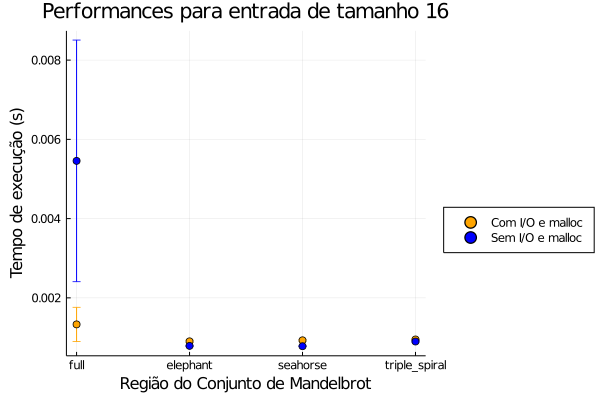

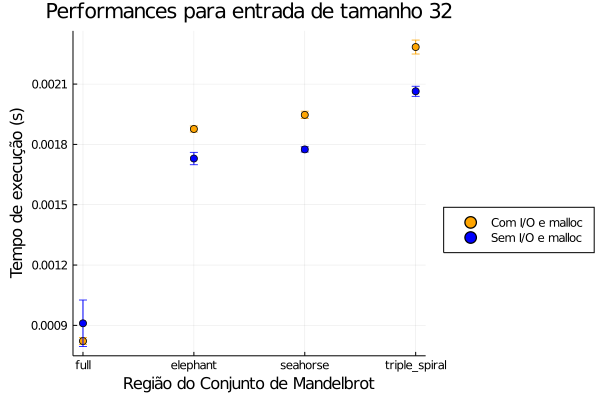

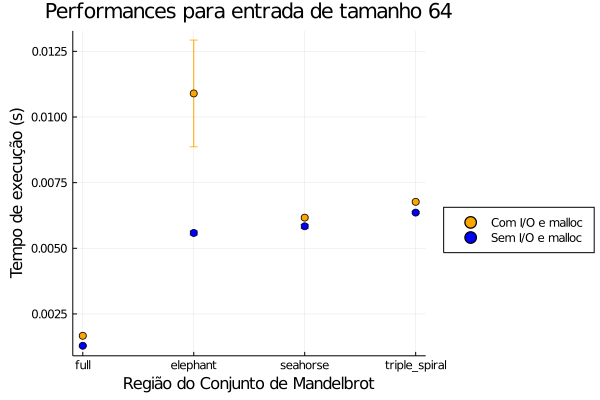

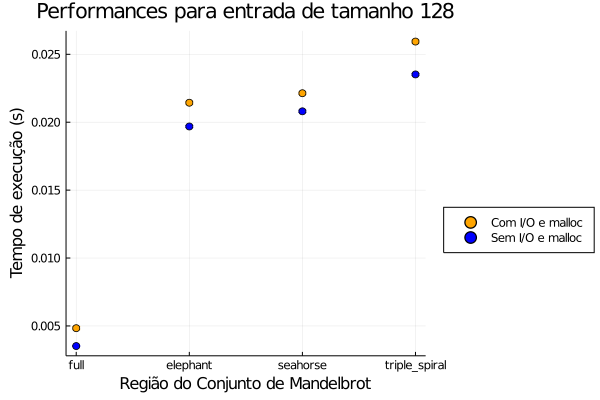

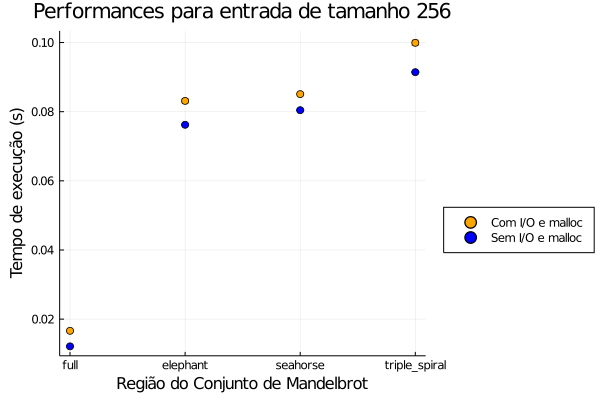

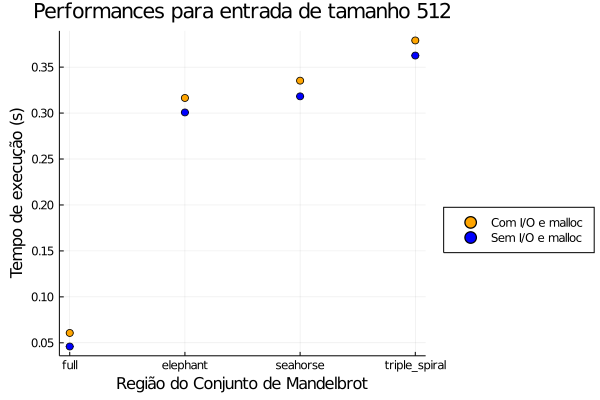

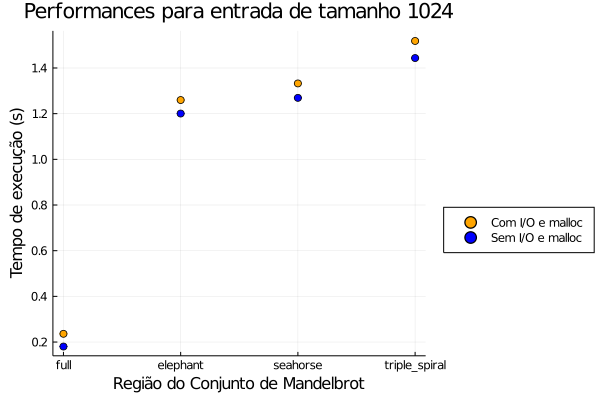

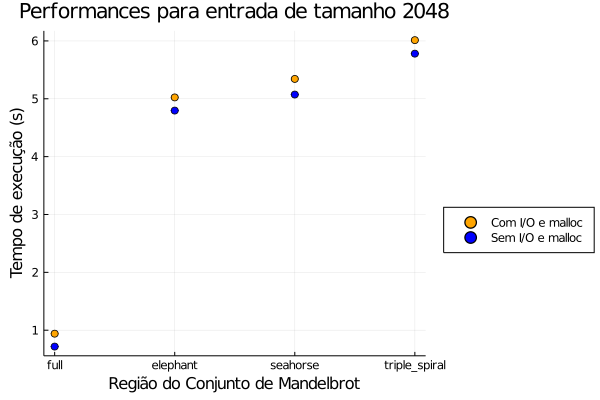

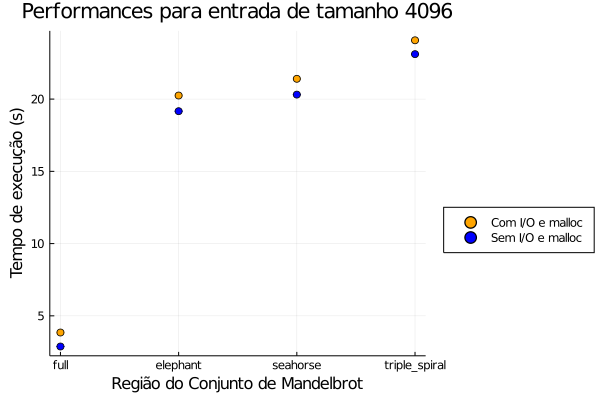

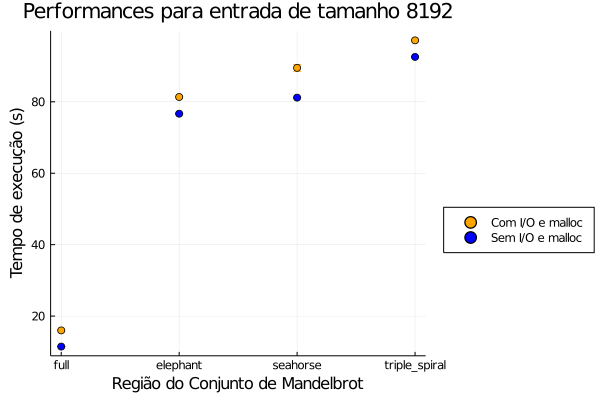

In [87]:
using Printf

function plot_sequencial(size, with_io_malloc, without_io_malloc)
    plt = plot(
        title = @sprintf("Performances para entrada de tamanho %d", size),
        xlabel = "Região do Conjunto de Mandelbrot",
        ylabel = "Tempo de execução (s)",
        legend = :outerright
    )
    scatter!(
        with_io_malloc[!, "region"],
        with_io_malloc[!, "mean"],
        yerror = with_io_malloc[!, "ci"],
        color = "orange",
        label = "Com I/O e malloc",
    )
    scatter!(
        without_io_malloc[!, "region"],
        without_io_malloc[!, "mean"],
        yerror = without_io_malloc[!, "ci"],
        color = "blue",
        label = "Sem I/O e malloc",
    )
    display(plt)
end

function charts_sequencial(data)
    for i = 4:13
        size = 2^i
        plot_sequencial(
            size,
            filter(row -> row["img_size"] == size && row["script"] == "mandelbrot_seq", data),
            filter(row -> row["img_size"] == size && row["script"] == "mandelbrot_seq_sem", data),
        )
    end
end

charts_sequencial(df)

### Pthreads

A função <i>plot_results_pth</i> abaixo recebe um conjunto de dados e constrói um gráfico que relaciona a média do tempo de execução no eixo Y com o tamanho da imagem no eixo X para cada número de threads entre $2^0$ a $2^5$.

In [526]:
using Plots
function plot_results_pth(data, name, yticksMax)   
    d1 = data[data[!, :threads] .== 1, :]
    d2 = data[data[!, :threads] .== 2, :]
    d4 = data[data[!, :threads] .== 4, :]
    d8 = data[data[!, :threads] .== 8, :]
    d16 = data[data[!, :threads] .== 16, :]
    d32 = data[data[!, :threads] .== 32, :]
    dframes = [[d1, "red", "1 Thread"], [d2, "green", "2 Threads"], [d4, "blue", "4 Threads"], [d8, "grey", "8 Threads"],
        [d16, "purple", "16 Threads"], [d32, "darkorange", "32 Threads"]]
    
    fig = plot(size=(800,800), xlabel = "Tamanho da Imagem (px)", ylabel = "Média do Tempo de Execução (s)",
        legend = :topleft, title = name, yticks = [x*2 for x in 0:yticksMax])
    
    for f in dframes        
        plot!(
            f[1].img_size[1:size(f[1], 1)],
            f[1].mean[1:size(f[1], 1)],
            color = f[2],
            labels = ""
        )
        scatter!(
            f[1].img_size[1:size(f[1], 1)],
            f[1].mean[1:size(f[1], 1)],
            yerror = f[1].ci[1:size(f[1], 1)],
            color = f[2],
            labels = f[3],
        )        
    end
    return fig
end 

plot_results_pth (generic function with 2 methods)

Assim, particionamos o DataFrame para obter apenas os dados resultantes do código paralelizado com Pthreads e utilizamos a função <i>plot_results_pth</i> para construir os gráficos para cada região do Conjunto de Mandelbrot.

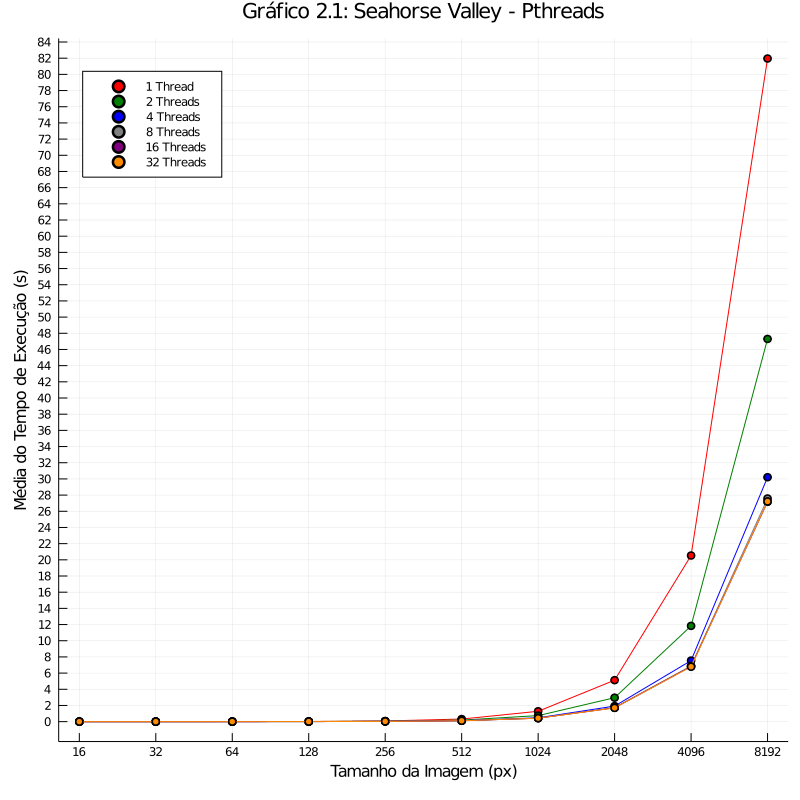

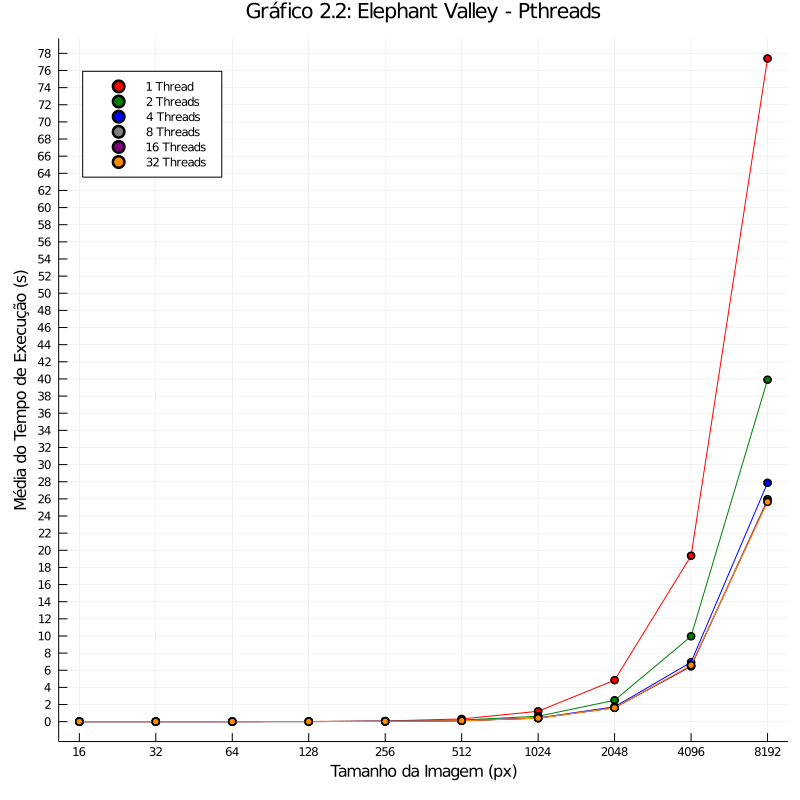

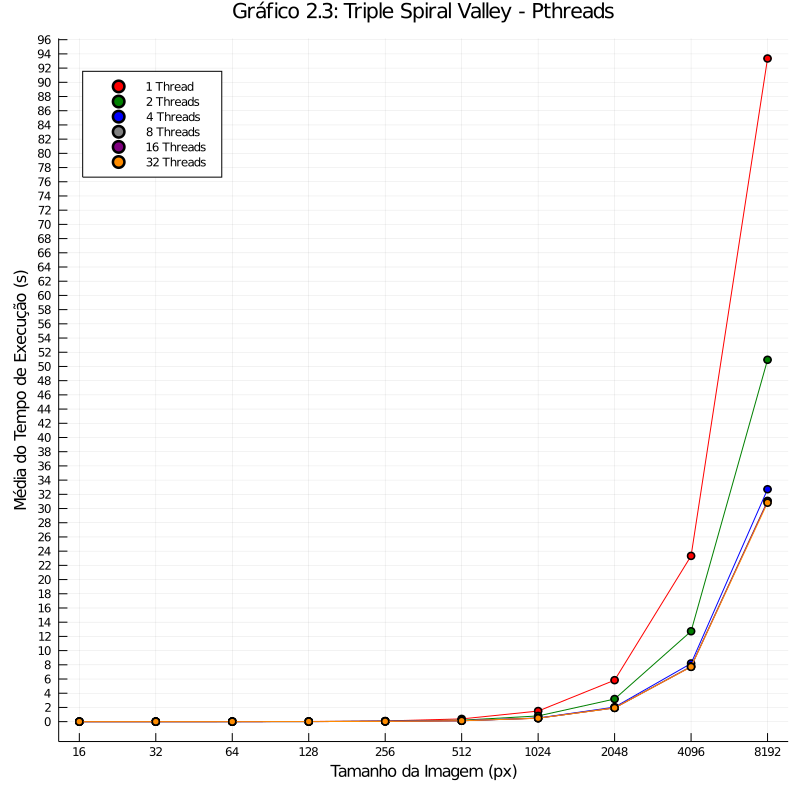

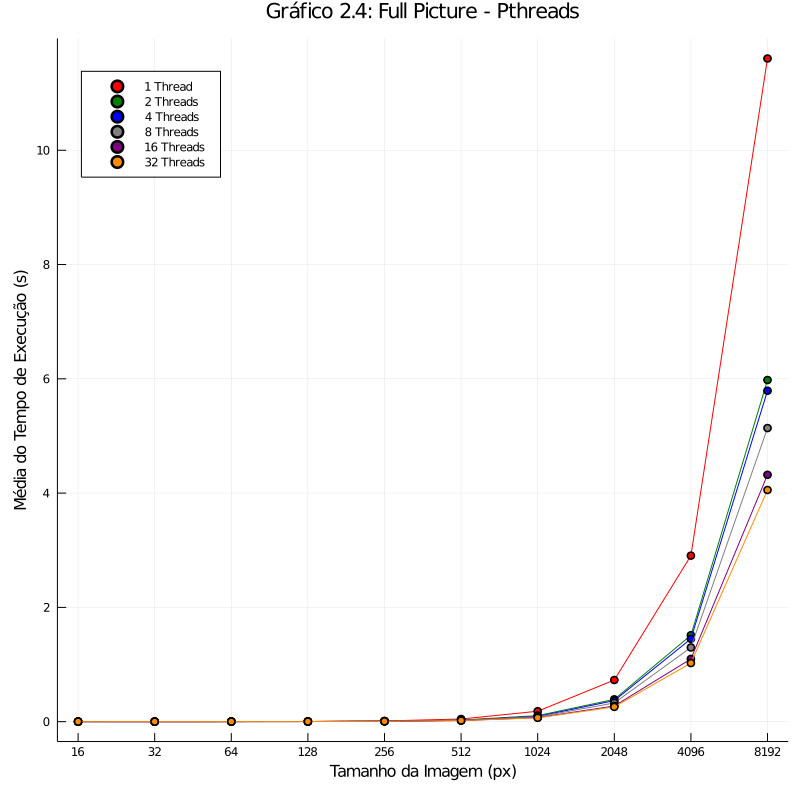

In [530]:
pth = df[df[!, :script] .== "mandelbrot_pth", :]

seahorse = pth[pth[!, :region] .== "seahorse", :]
seahorse[!, :img_size] = string.(seahorse[!, :img_size])
display(plot_results_pth(seahorse, "Gráfico 2.1: Seahorse Valley - Pthreads", 90))

elephant = pth[pth[!, :region] .== "elephant", :]
elephant[!, :img_size] = string.(elephant[!, :img_size])
display(plot_results_pth(elephant, "Gráfico 2.2: Elephant Valley - Pthreads", 90))

triple_spiral = pth[pth[!, :region] .== "triple_spiral", :]
triple_spiral[!, :img_size] = string.(triple_spiral[!, :img_size])
display(plot_results_pth(triple_spiral, "Gráfico 2.3: Triple Spiral Valley - Pthreads", 90))

full = pth[pth[!, :region] .== "full", :]
full[!, :img_size] = string.(full[!, :img_size])
display(plot_results_pth(full, "Gráfico 2.4: Full Picture - Pthreads", 15))

Observando os gráficos é possível ver que todas as regiões seguem um comportamento semelhante em relação à interação entre as variáveis:<br>

Para os tamanhos de imagem menores, o número de threads usados não tende a afetar o tempo de execução do código. Entretanto, a partir do tamanho de imagem igual a 1024px, já é possível ver que o tempo de execução do código começa a ficar mais longo quanto menor o número de threads usados na execução. No tamanho de imagem igual a 8192px, o tempo de execução com apenas 1 thread se torna consideravelmente mais longo que os outros, chegando a ser aproximadamente 100% mais lento que a execução com 2 threads e aproximadamente 200% mais lento que a execução com 32 threads.<br>
Outro fator que é possível ser observado é que em todas as regiões com exceção da <i>Full Picture</i>, o tempo de execução do código mostrado nos gráficos para 8, 16 e 32 threads é bem próximo. Já na região <i>Full Picture</i>, os tempos se apresentam mais espaçados entre si. Esse fator pode se originar do fato de que a execução da região <i>Full Picture</i> leva bem menos tempo em relação às outras, o que faz com que o seu gráfico tenha uma escala menor e assim detalhe melhor as diferenças.

Para poder comparar melhor as diferenças entre os tempos de execução para os diferentes números de threads, serão analisados gráficos que relacionam o número de threads com as médias dos tempos de execução para um determinado tamanho de imagem. 

Para construir esses gráficos será utilizada a função <i>thr_mean_pth</i> definida abaixo. Essa função constrói um gráfico com as médias dos tempos de execução no eixo Y e os números de threads no eixo X para o determinado tamanho de imagem. 

In [523]:
function thr_mean_pth(data, name, img_size, ytick)
    fig = plot(size=(800,800), xlabel = "Número de Threads", ylabel = "Média do Tempo de Execução (s)",
        legend = :topright, title = name, xticks = [2^x for x in 0:6], yticks = ytick)
    d = data[data[!, :img_size] .== img_size, :]
    scatter!(
        d.threads[1:size(d, 1)],
        d.mean[1:size(d, 1)],
        yerror = d.ci[1:size(d, 1)],
        label = false,
        marksersize = 100
    )        
    return fig
end

thr_mean_pth (generic function with 3 methods)

Devido ao grande número de combinações possíveis, foram escolhidos apenas alguns tamanhos de imagens e de regiões para que o número de gráficos não ficasse muito alto. Como foi visto na análise anterior, a região <i>Full Picture</i> se comporta de maneira diferente do que as outras regiões, portanto ela será usada nessa análise junto com a região <i>Seahorse Valley</i>. Em relação ao tamanho de imagem, foram escolhidos os tamanhos 64px, 2048px e 8192px. 

Na célula abaixo, são construídos e apresentados os gráficos que relacionam a média do tempo de execução com o número de threads para a região <i>Seahorse Valley</i> para os tamanhos de imagem 64px, 2048px e 8192px:

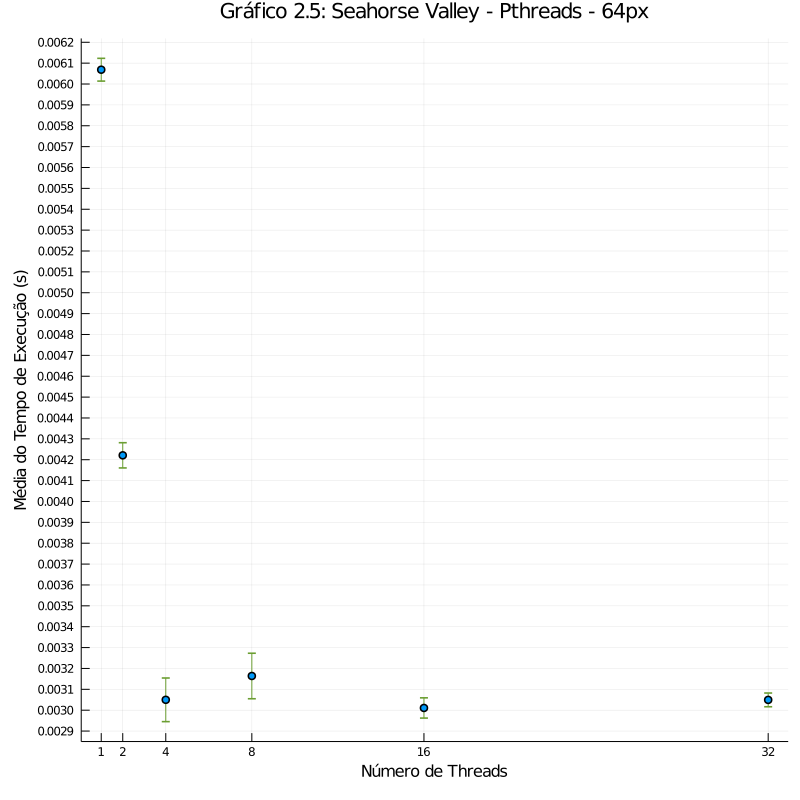

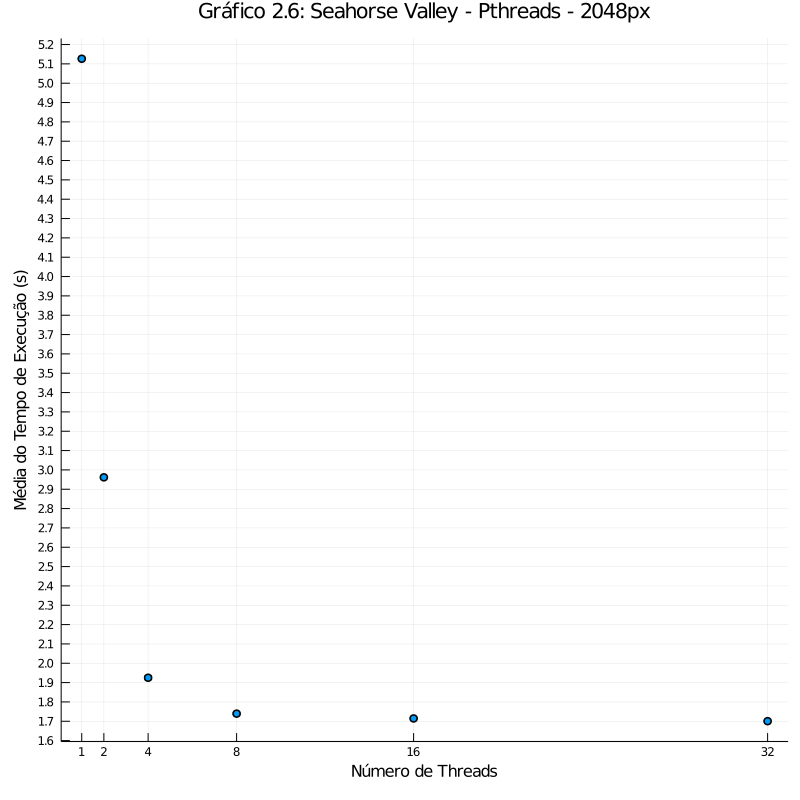

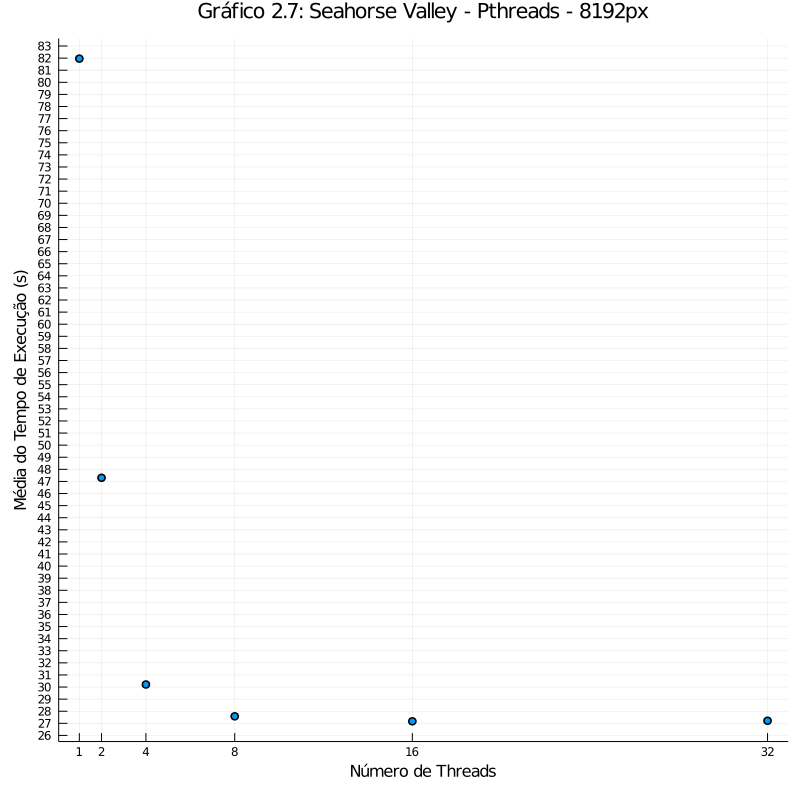

In [524]:
display(thr_mean_pth(seahorse, "Gráfico 2.5: Seahorse Valley - Pthreads - 64px", "64", 0:0.0001:0.0065))
display(thr_mean_pth(seahorse, "Gráfico 2.6: Seahorse Valley - Pthreads - 2048px", "2048", 0:0.1:7))
display(thr_mean_pth(seahorse, "Gráfico 2.7: Seahorse Valley - Pthreads - 8192px", "8192", 0:1:85))

Observando os gráficos é possível notar que para os tamanhos de imagem 2048px e 8192px, o número de threads afeta drasticamente a performance do código. Por exemplo, com 32 e 16 threads para o tamanho 8192px, o código teve uma média de tempo de execução de aproximadamente 27 segundos, enquanto para 2 threads no mesmo tamanho o código teve uma média de 47.5 segundos (aumento de ~175%). Essa grande disparidade já é notável ao comparar o uso de 2 threads com o uso de 1 thread: para o tamanho 2048px, o código com 2 threads teve uma média de tempo de execução de 2.95 segundos enquanto o código com 1 thread teve uma média de 5.1 segundos (aumento de ~172%). Essa tendência também aparece em grande parte para o tamanho de imagem 64px, porém nele é possível observar uma exceção na qual a média do tempo de execução com 8 threads é maior que a média com 4 threads, o que não acontece nos outros tamanhos de imagem onde o número de threads é sempre inversamente proporcional à media do tempo de execução.<br>
Outro detalhe que é observável nos gráficos é relacionado aos valores dos intervalos de confiança. Para o tamanho de imagem 64px, os intervalos são visíveis enquanto para os outros tamanhos maiores, os intervalos não aparecem no gráfico. Esse fator pode estar relacionado à precisão na realização dos experimentos. Para um tamanho de imagem menor, os experimentos são executados mais rapidamente, o que pode levar a medições muito pequenas e valores de desvio padrão mais altos, consequentemente levando a um intervalo de confiança maior em relação à média.

Na célula abaixo, são construídos e apresentados os gráficos que relacionam a média do tempo de execução com o número de threads para a região <i>Full Picture</i> para os tamanhos de imagem 64px, 2048px e 8192px:

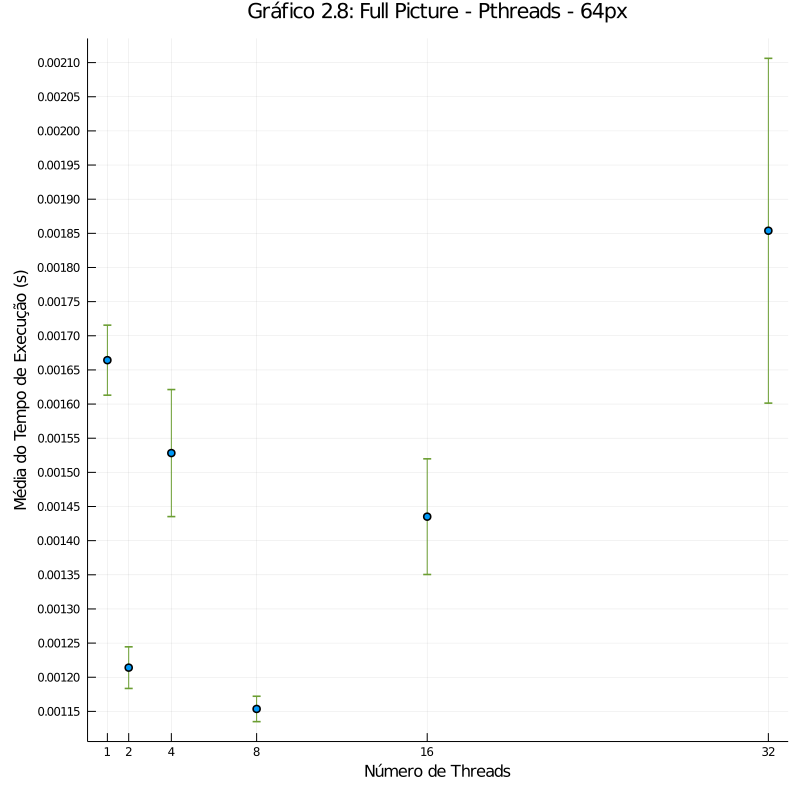

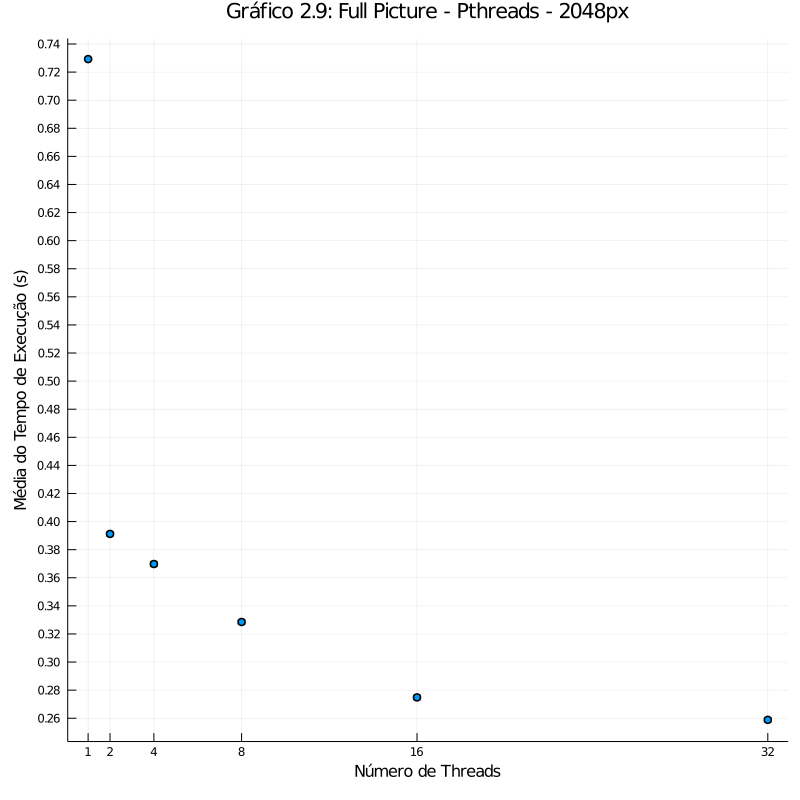

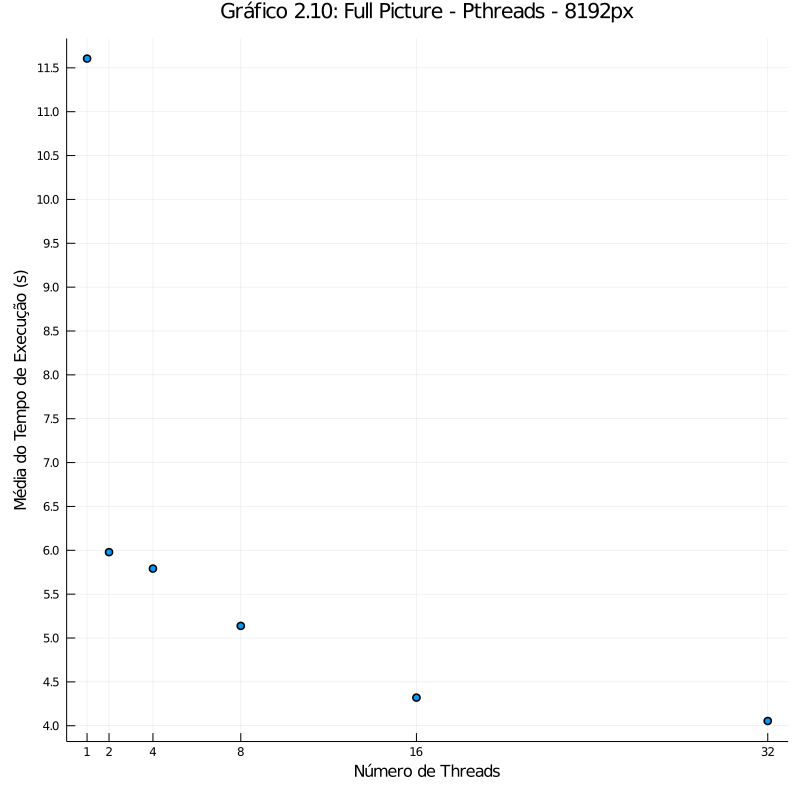

In [525]:
display(thr_mean_pth(full, "Gráfico 2.8: Full Picture - Pthreads - 64px", "64", 0:0.00005:0.0024))
display(thr_mean_pth(full, "Gráfico 2.9: Full Picture - Pthreads - 2048px", "2048", 0:0.02:0.9))
display(thr_mean_pth(full, "Gráfico 2.10: Full Picture - Pthreads - 8192px", "8192", 0:0.5:13))

Observando os gráficos é possível notar que, da mesma forma que ocorre com a região <i>Seahorse Valley</i> vista anteriormente, na região <i>Full Picture</i> para os tamanhos de imagem maiores, o número de threads é inversamente proporcional à performance do código. Por exemplo, com 32 threads para o tamanho 8192px, o código teve uma média de tempo de execução de aproximadamente 4 segundos enquanto que com 1 thread o código teve uma média de 11.6 segundos (aumento de ~290%).<br>
Outro ponto interessante que é possível visualizar no gráfico é a não existência de relação entre o número de threads e a média do tempo de execução para o tamanho de imagem 64px. Para esse tamanho, o gráfico mostra por exemplo que usando 32 threads a execução do código teve uma média de tempo de execução de aproximadamente 0.00185 segundos enquanto que para 1 thread o código teve uma média de 0.00166 segundos (diminuição de ~11%).

Uma das grandes diferenças notáveis entre os resultados das regiões <i>Full Picture</i> e <i>Seahorse Valley</i> é o intervalo dos valores das médias de tempo de execução. Por exemplo, na região <i>Seahorse Valley</i> para o tamanho de imagem 2048px, as médias possuem valores entre 1.7 e 5.2 segundos enquanto na região <i>Full Picture</i> para o mesmo tamanho, os valores das médias ficam entre 0.25 e 0.74 segundos.

Assim, após visualizar e analisar os gráficos, é possível concluir que a média do tempo de execução do código do cálculo do Conjunto de Mandelbrot paralelizado com Pthreads é inversamente proporcional ao número de threads usados na paralelização para tamanhos de imagem maiores, isto é, quanto mais threads usadas na execução do código, melhor a performance. Também é possível concluir que, independente do número de threads, quanto maior o tamanho da imagem, maior a média do tempo de execução do código e que para a região <i>Full Picture</i> o código é executado mais rapidamente do que para as outras regiões (que se comportam semelhantemente nesse aspecto), para todos as combinações de parâmetros.

### OpenMP

### Relação entre os Códigos

Levando em conta que a execução do código sequencial sem operações de I/O e sem alocação de memória é equivalente à execução dos códigos paralelizados com o número de threads igual a 1 e observando os resultados analisados, é possível concluir que para execuções com números de threads maiores que 1, a performance de ambos os códigos paralelizados é claramente melhor do que a performance do código sequencial em todas as regiões do Conjunto de Mandelbrot para os tamanhos de imagens consideráveis.

Assim, não é possível comparar todos os códigos entre si em relação ao número de threads. Porém, é possível comparar nesse aspecto as médias dos tempos de execução do código paralelizado com Pthreads com o código paralelizado com OpenMP.

Para comparar os códigos paralelizados em relação às threads será utilizada a função <i>omp_pth</i> definida abaixo, que recebe as partições do dataframe relacionadas aos códigos para um determinado tamanho de imagem e constrói os gráficos relacionando a média do tempo de execução no eixo Y com o número de threads no eixo X para cada região do Conjunto de Mandelbrot de ambos os códigos.

In [531]:
function omp_pth(pth, omp, region, name, ytick)
    pth_aux = pth[pth[!, :region] .== region, :]
    omp_aux = omp[omp[!, :region] .== region, :]
    fig = plot(xlabel="Número de Threads", ylabel="Média do Tempo de Execução (s)", legend=:topright, title=name,
            xticks=[2^x for x in 0:6], yticks=ytick)
    scatter!(
        pth_aux.threads[1:size(pth_aux, 1)],
        pth_aux.mean[1:size(pth_aux, 1)],
        yerror = pth_aux.ci[1:size(pth_aux, 1)],
        color = "red",
        labels = "Pthreads"
    )
    scatter!(
        omp_aux.threads[1:size(omp_aux, 1)],
        omp_aux.mean[1:size(omp_aux, 1)],
        yerror = omp_aux.ci[1:size(omp_aux, 1)],
        color = "blue",
        labels = "OpenMP"
    )
    return fig
end

omp_pth (generic function with 2 methods)

Nas células abaixo são construídos e apresentados os gráficos que relacionam os códigos paralelizados em relação ao número de threads para todas as regiões do Conjunto de Mandelbrot para os tamanhos de imagem 64px, 4096px e 8192px:

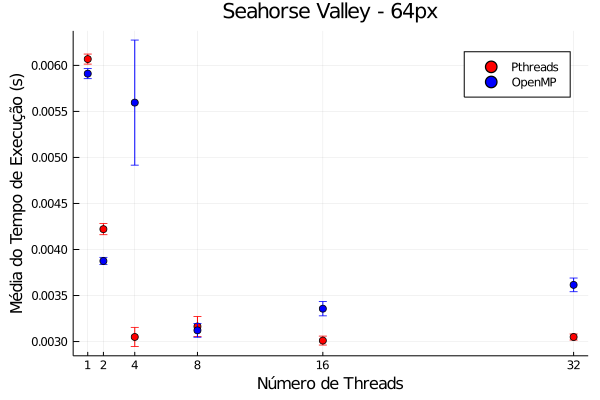

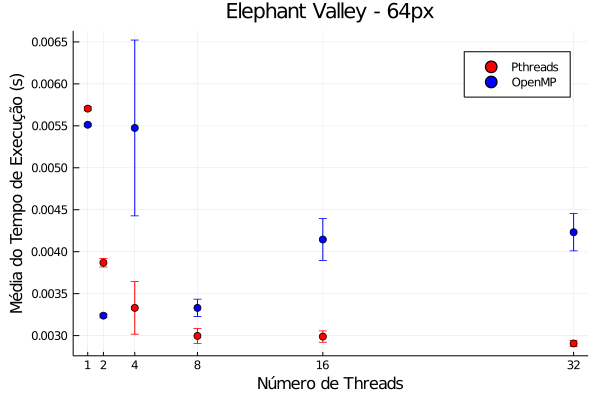

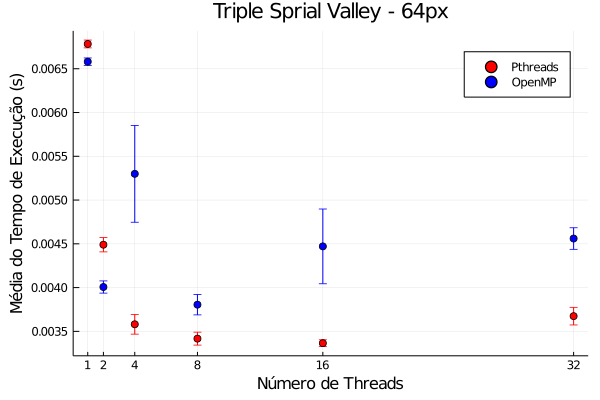

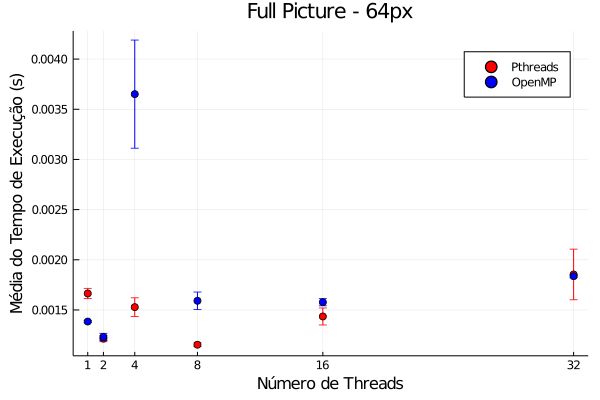

In [533]:
omp = df[df[!, :script] .== "mandelbrot_omp", :]
pth_i = pth[pth[!, :img_size] .== 64, :]
omp_i = omp[omp[!, :img_size] .== 64, :]

display(omp_pth(pth_i, omp_i, "seahorse", "Seahorse Valley - 64px", 0:0.0005:0.01))
display(omp_pth(pth_i, omp_i, "elephant", "Elephant Valley - 64px", 0:0.0005:0.01))
display(omp_pth(pth_i, omp_i, "triple_spiral", "Triple Sprial Valley - 64px", 0:0.0005:0.01))
display(omp_pth(pth_i, omp_i, "full", "Full Picture - 64px", 0:0.0005:0.009))

Observando os resultados dos gráficos é possível visualizar que para o tamanho de imagem 64px não parece haver um padrão nas diferenças de performance da execução do cálculo do Conjunto de Mandelbrot entre o código paralelizado com Pthreads e o código paralelizado com OpenMP em nenhuma das regiões. Também é possível visualizar que em certas combinações de números de threads com região, a média do tempo de execução é maior no código com Pthreads do que no código com OpenMP (e.g. 2 threads na região <i>Seahorse</i>) enquanto em outras ocorre o inverso (e.g. 4 threads na região <i>Full Picture</i>).

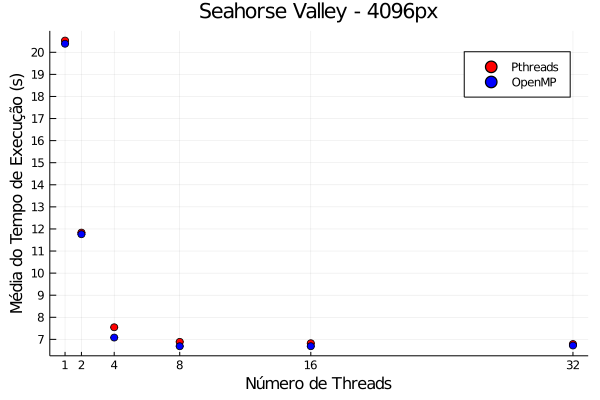

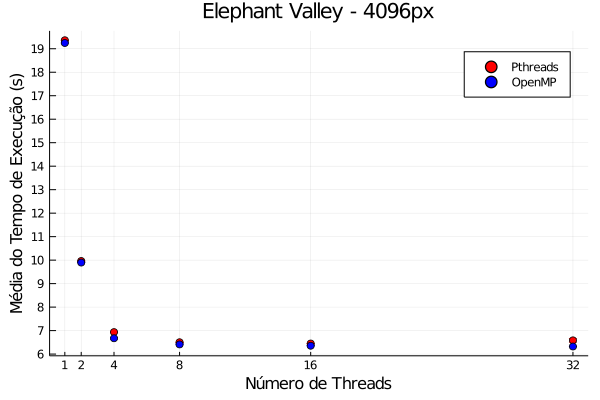

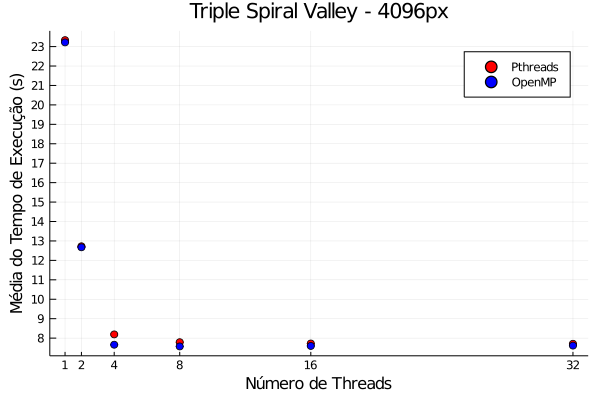

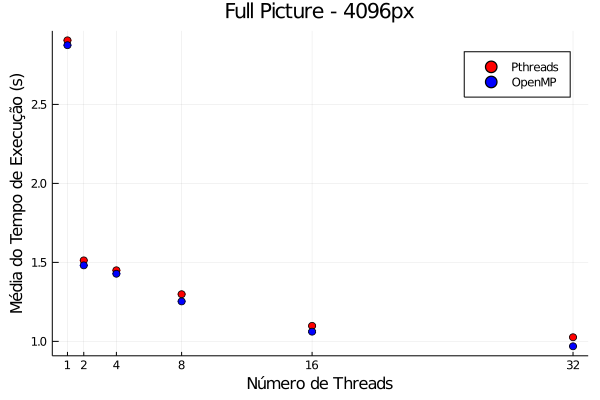

In [538]:
pth_i = pth[pth[!, :img_size] .== 4096, :]
omp_i = omp[omp[!, :img_size] .== 4096, :]

display(omp_pth(pth_i, omp_i, "seahorse", "Seahorse Valley - 4096px", 5:25))
display(omp_pth(pth_i, omp_i, "elephant", "Elephant Valley - 4096px", 5:25))
display(omp_pth(pth_i, omp_i, "triple_spiral", "Triple Spiral Valley - 4096px", 5:25))
display(omp_pth(pth_i, omp_i, "full", "Full Picture - 4096px", 0:0.5:4))

Observando o resultado dos gráficos é possível visualizar que para o tamanho de imagem 4096px, em todas as regiões do Conjunto de Mandelbrot o comportamento das médias do tempo de execução do código paralelizado com Pthreads é bem semelhante ao comportamento das médias do código paralelizado com OpenMP.<br>
Além disso, é possível verificar que em nenhum dos casos a média do tempo de execução do código com Pthreads é menor que a média do código com OpenMP, isto é, a média do código com OpenMP é sempre menor ou equivalente à do código com Pthreads.

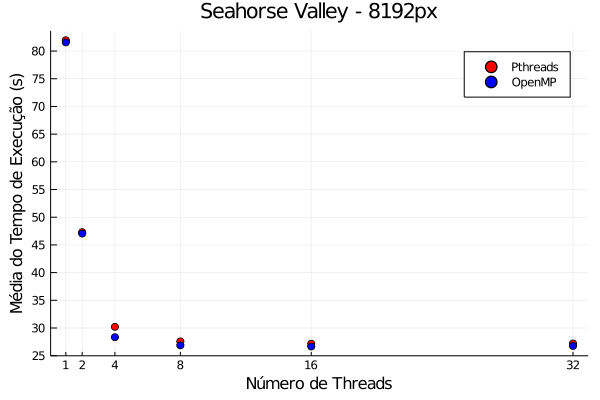

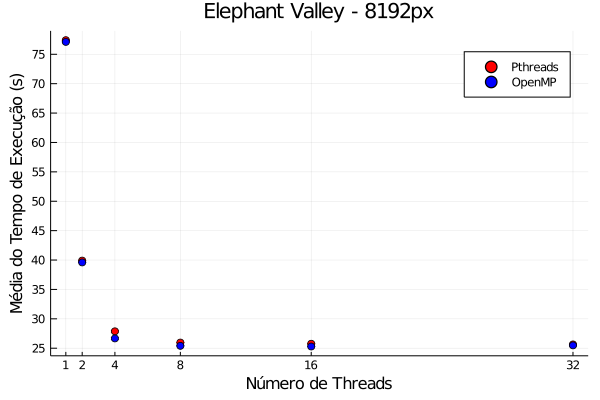

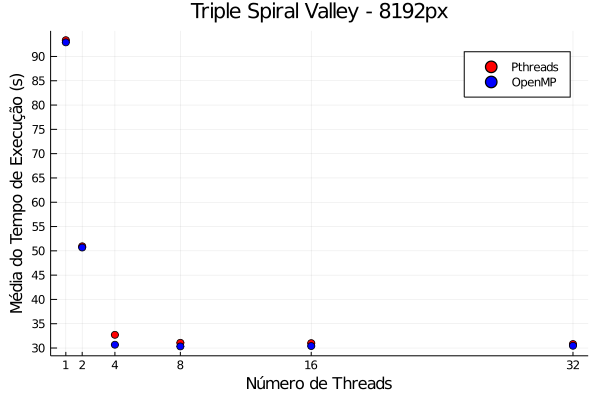

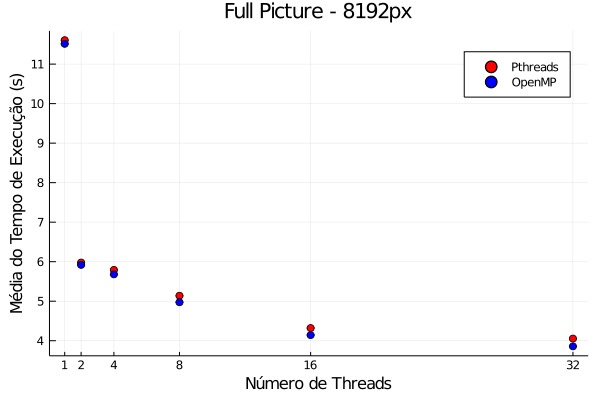

In [544]:
pth_i = pth[pth[!, :img_size] .== 8192, :]
omp_i = omp[omp[!, :img_size] .== 8192, :]

display(omp_pth(pth_i, omp_i, "seahorse", "Seahorse Valley - 8192px", 25:5:90))
display(omp_pth(pth_i, omp_i, "elephant", "Elephant Valley - 8192px", 25:5:90))
display(omp_pth(pth_i, omp_i, "triple_spiral", "Triple Spiral Valley - 8192px", 25:5:90))
display(omp_pth(pth_i, omp_i, "full", "Full Picture - 8192px", 2:15))

Observando o resultado dos gráficos é possível visualizar que para o tamanho de imagem 8192px, da mesma forma que ocorre com o tamanho de imagem de 4096px, em todas as regiões do Conjunto de Mandelbrot o comportamento das médias do tempo de execução do código paralelizado com Pthreads é semelhante ao comportamento das médias do código paralelizado com OpenMP.<br>
Além disso, da mesma forma que com o tamanho de imagem de 4096px, em nenhum caso a média do tempo de execução do código paralelizado com Pthreads é menor que a média do código paralelizado com OpenMP.

Assim, podemos concluir que para tamanhos maiores de imagem, o código paralelizado com OpenMP tem uma performance levemente melhor que o código paralelizado com Pthreads em todos os números de threads e regiões. Também podemos dizer que para tamanhos muito pequenos de imagem, não parece haver uma vantagem explícita entre os dois tipos de códigos paralelizados quanto às regiões do Conjunto de Mandelbrot e também que não parece haver algum padrão de melhora na performance quanto ao número de threads nos dois códigos.